In [19]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [22]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth = 5.3

In [23]:
# Fetch current BTC price
btc_url = btc_url
eth_url = eth_url

In [24]:
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [25]:
# Execute GET request and store response
response_data1 = requests.get(btc_url).json()
response_data2 = requests.get(eth_url).json()

#To Preview data1
response_data1

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19497425,
   'total_supply': 19497425,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 26663.0,
     'volume_24h': 12413814034,
     'market_cap': 520528138672,
     'percentage_change_1h': -0.219738384341989,
     'percentage_change_24h': 1.69019007016717,
     'percentage_change_7d': -1.51062519688846,
     'percent_change_1h': -0.219738384341989,
     'percent_change_24h': 1.69019007016717,
     'percent_change_7d': -1.51062519688846},
    'CAD': {'price': 36221.6855,
     'volume_24h': 16864166365.189,
     'market_cap': 707137476385.912,
     'percent_change_1h': -0.219738384341989,
     'percent_change_24h': 1.69019007016717,
     'percent_change_7d': -1.51062519688846}},
   'last_updated': 1695822597}},
 'metadata': {'timestamp': 1695822597,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [26]:
#data2
response_data2

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120233868,
   'total_supply': 120233868,
   'max_supply': 120233868,
   'quotes': {'USD': {'price': 1620.13,
     'volume_24h': 7460442624,
     'market_cap': 195075686967,
     'percentage_change_1h': -0.143338356944123,
     'percentage_change_24h': 2.08189325302946,
     'percentage_change_7d': -0.405094785902488,
     'percent_change_1h': -0.143338356944123,
     'percent_change_24h': 2.08189325302946,
     'percent_change_7d': -0.405094785902488},
    'CAD': {'price': 2200.946605,
     'volume_24h': 10135011304.704,
     'market_cap': 265010320744.67,
     'percent_change_1h': -0.143338356944123,
     'percent_change_24h': 2.08189325302946,
     'percent_change_7d': -0.405094785902488}},
   'last_updated': 1695822598}},
 'metadata': {'timestamp': 1695822598,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [27]:
# to allocate the price
response_data1["data"]["1"]["quotes"]["USD"]["price"]
response_data2["data"]["1027"]["quotes"]["USD"]["price"]

1620.13

In [28]:
# to find the current asset value
BTC_asset_value= response_data1["data"]["1"]["quotes"]["USD"]["price"] * my_btc
ETH_asset_value= response_data2["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

In [29]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${BTC_asset_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${ETH_asset_value:0.2f}")

The current value of your 1.2 BTC is $31995.60
The current value of your 5.3 ETH is $8586.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [30]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares= {"shares": [200, 50]}

# Set the tickers
tickers = ["AGG", "SPY"]


# Create the shares DataFrame with `tickers` as index
shares_numbers = pd.DataFrame(shares, index=tickers)

# Display shares data
shares_numbers

,shares
AGG,200
SPY,50


In [31]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [32]:
# Get current closing prices for SPY and AGG
today = pd.Timestamp("2023-09-25", tz="America/New_York").isoformat()

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [38]:
# Get current price data for MSFT and AAPL
df_shares = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_shares

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-09-25 04:00:00+00:00,94.49,94.6175,94.285,94.30,7485388,25131,94.415114,AGG
2023-09-25 04:00:00+00:00,429.17,432.2700,428.720,432.23,70893062,488407,430.901010,SPY


In [39]:
# Separate ticker data
AGG = df_shares[df_shares["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_shares[df_shares["symbol"]=="SPY"].drop("symbol", axis=1)

In [40]:
# Concatenate the ticker DataFrames
df_shares = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Drop the time component of the date
df_shares.index = df_shares.index.date

In [41]:
# Preview DataFrame
df_shares

AGG                                                         \
             open     high     low close   volume trade_count       vwap   
2023-09-25  94.49  94.6175  94.285  94.3  7485388       25131  94.415114   

               SPY                                                           
              open    high     low   close    volume trade_count       vwap  
2023-09-25  429.17  432.27  428.72  432.23  70893062      488407  430.90101

In [42]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = df_shares["AGG"]["close"]
df_closing_prices["SPY"] = df_shares["SPY"]["close"]

df_closing_prices

,AGG,SPY
2023-09-25,94.3,432.23


In [43]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices["AGG"].iloc[0]
spy_close_price=df_closing_prices["SPY"].iloc[0]
agg_close_price

94.3

In [44]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.3
Current SPY closing price: $432.23


In [45]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21611.50
The current value of your 200 AGG shares is $18860.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 6000

# Consolidate financial assets data
Shares = my_agg_value + my_spy_value
Shares



40471.5

In [49]:
# Total Crytp current value
Crypto = BTC_asset_value+ETH_asset_value
Crypto

40582.289

In [55]:
Value= {"Value": [Shares, Crypto]}

# Set the tickers
tickers_2 = ["Crypto", "Equity"]

# Create the holdingsDataFrame with `tickers` as index
Holdings = pd.DataFrame(Value, index=tickers_2)

# Display shares data
Holdings

,Value
Crypto,40471.500
Equity,40582.289


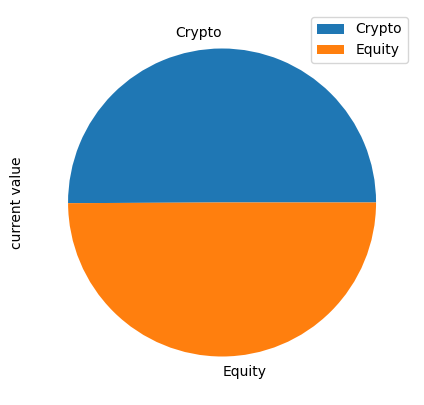

In [71]:
# Plot savings pie chart
df = pd.DataFrame({'current value': [Crypto, Shares]}, index=['Crypto', 'Equity'])
plot = df.plot.pie(y='current value', figsize=(5, 5))

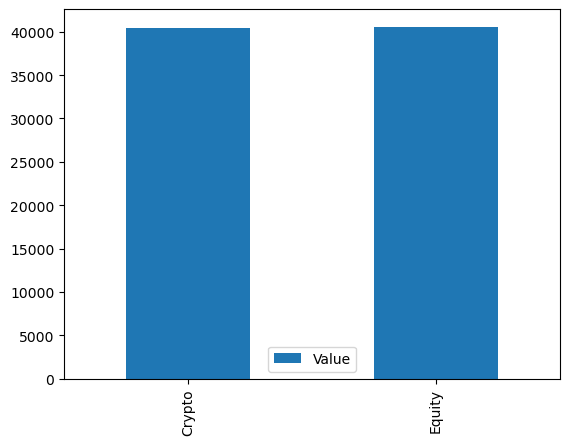

In [72]:
# Plot savings bar chart
dist_plot = Holdings.plot(kind="bar")

In [94]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_holdings = Shares + Crypto
# Calculate total amount of savings
total_savings = total_holdings - emergency_fund

# Validate saving health
if total_savings>0:
    print("Congratulations! You have enough money in your emergency fund")
    print(f"{total_savings:0.2f}")
elif total_savings<0:
    print("You do not have enough money in your emergency fund")

Congratulations! You have enough money in your emergency fund
63053.79
